# Weed Portfolio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# SpaceX
title = "Weed"
symbols = ['ABBV', 'BUD', 'MO','TAP','SMG','CGC', 'GWPH', 'CRON', 'ACB', 'TLRY', 'CRBP', 'CTST', 'NBEV', 'TRTC', 'CANN', 'MJ']
start = '2018-01-01'
end = '2020-06-25'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

904

In [7]:
df.head()

ABBV         BUD         MO        TAP         SMG  \
Date                                                                  
2018-01-02  85.888794  104.851608  59.916634  76.489159  102.167892   
2018-01-03  87.232849  105.663048  59.696426  75.754410  102.346863   
2018-01-04  86.735374  105.952171  59.459267  76.265945  100.001511   
2018-01-05  88.245255  107.015411  59.628662  77.130905  101.395546   
2018-01-08  86.831360  106.278618  59.552422  77.958679  102.770699   

                  CGC        GWPH  CRON         ACB  TLRY  CRBP  CTST   NBEV  \
Date                                                                           
2018-01-02  25.879999  134.089996   NaN  113.760002   NaN  7.95   NaN  2.220   
2018-01-03  28.650000  134.410004   NaN  135.720001   NaN  8.50   NaN  2.177   
2018-01-04  25.889999  133.919998   NaN  125.400002   NaN  8.35   NaN  2.120   
2018-01-05  27.389999  133.429993   NaN  127.320000   NaN  7.80   NaN  2.170   
2018-01-08  32.110001  131.500000   NaN  134.220001   NaN  8.10   NaN  2.140   

            TRTC   CANN         MJ  
Date                                
2018-01-02  6.90   8.15  32.423748  
2018-01-03  6.15  10.35  34.465618  
2018-01-04  4.20   7.76  32.332596  
2018-01-05  5.10   8.06  33.225918  
2018-01-08  5.55   9.87  35.021660

In [8]:
df.tail()

ABBV        BUD         MO        TAP         SMG        CGC  \
Date                                                                            
2020-06-18  96.230003  51.779999  41.470001  39.080002  129.850006  17.180000   
2020-06-19  96.709999  50.439999  40.689999  38.029999  129.429993  17.330000   
2020-06-22  97.269997  50.880001  40.049999  37.950001  130.149994  17.370001   
2020-06-23  97.309998  52.099998  40.340000  37.970001  131.929993  17.240000   
2020-06-24  95.139999  48.919998  39.430000  36.500000  129.580002  16.709999   

                  GWPH  CRON    ACB  TLRY  CRBP  CTST  NBEV  TRTC    CANN  \
Date                                                                        
2020-06-18  131.179993  6.56  13.01  8.56  7.97   NaN  1.74  0.13  0.4725   
2020-06-19  129.710007  6.42  13.37  8.30  7.68   NaN  1.70  0.12  0.4600   
2020-06-22  125.849998  6.45  13.72  8.41  7.84   NaN  1.64  0.11  0.4101   
2020-06-23  125.000000  6.53  13.58  8.56  8.15   NaN  1.62  0.11  0.4280   
2020-06-24  121.680000  6.38  13.67  8.15  7.96   NaN  1.50  0.11  0.4111   

               MJ  
Date               
2020-06-18  13.66  
2020-06-19  13.51  
2020-06-22  13.50  
2020-06-23  13.56  
2020-06-24  13.17

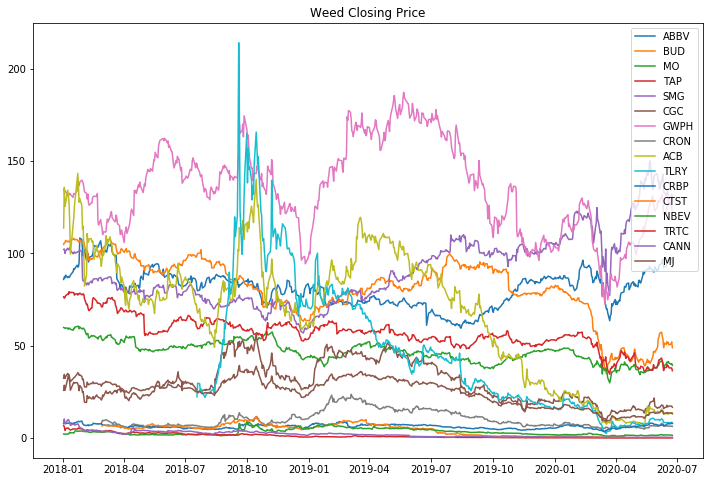

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

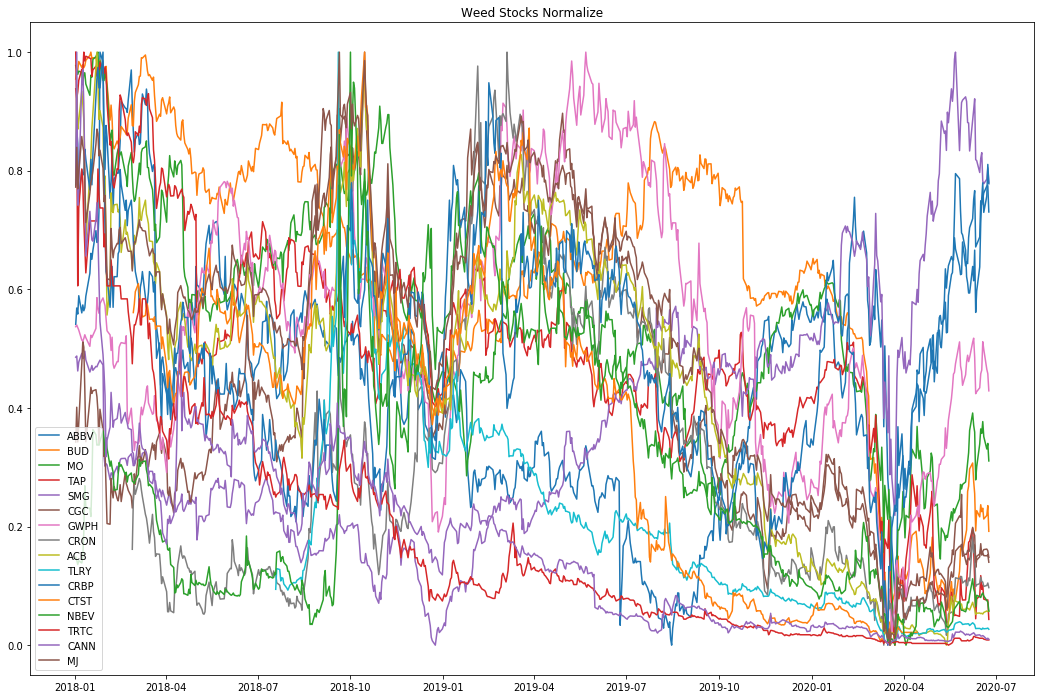

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

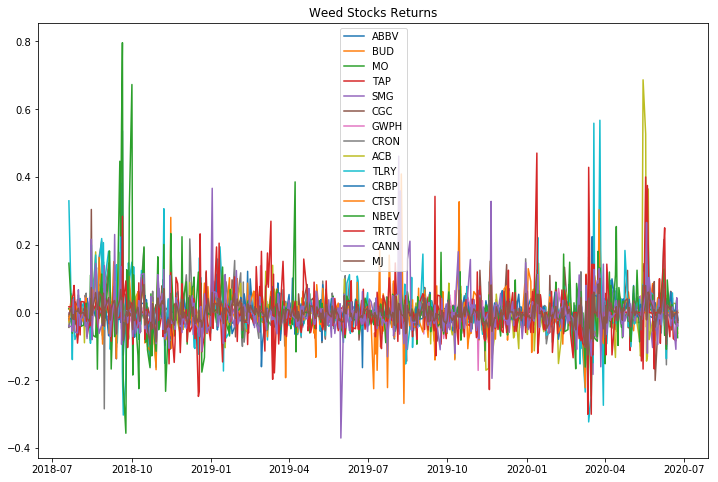

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

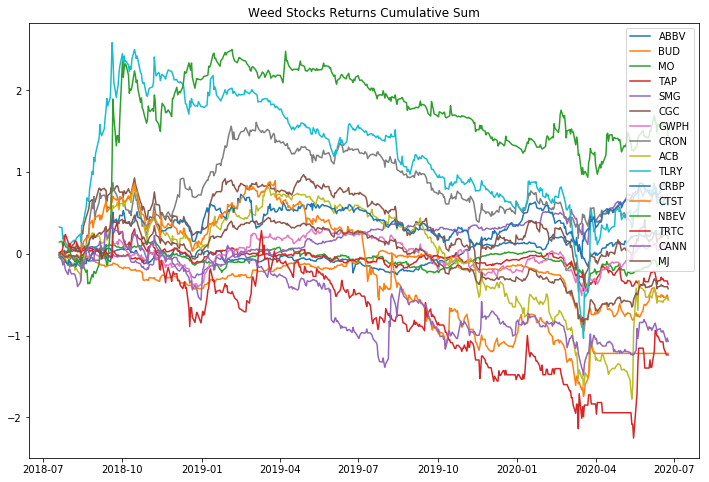

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

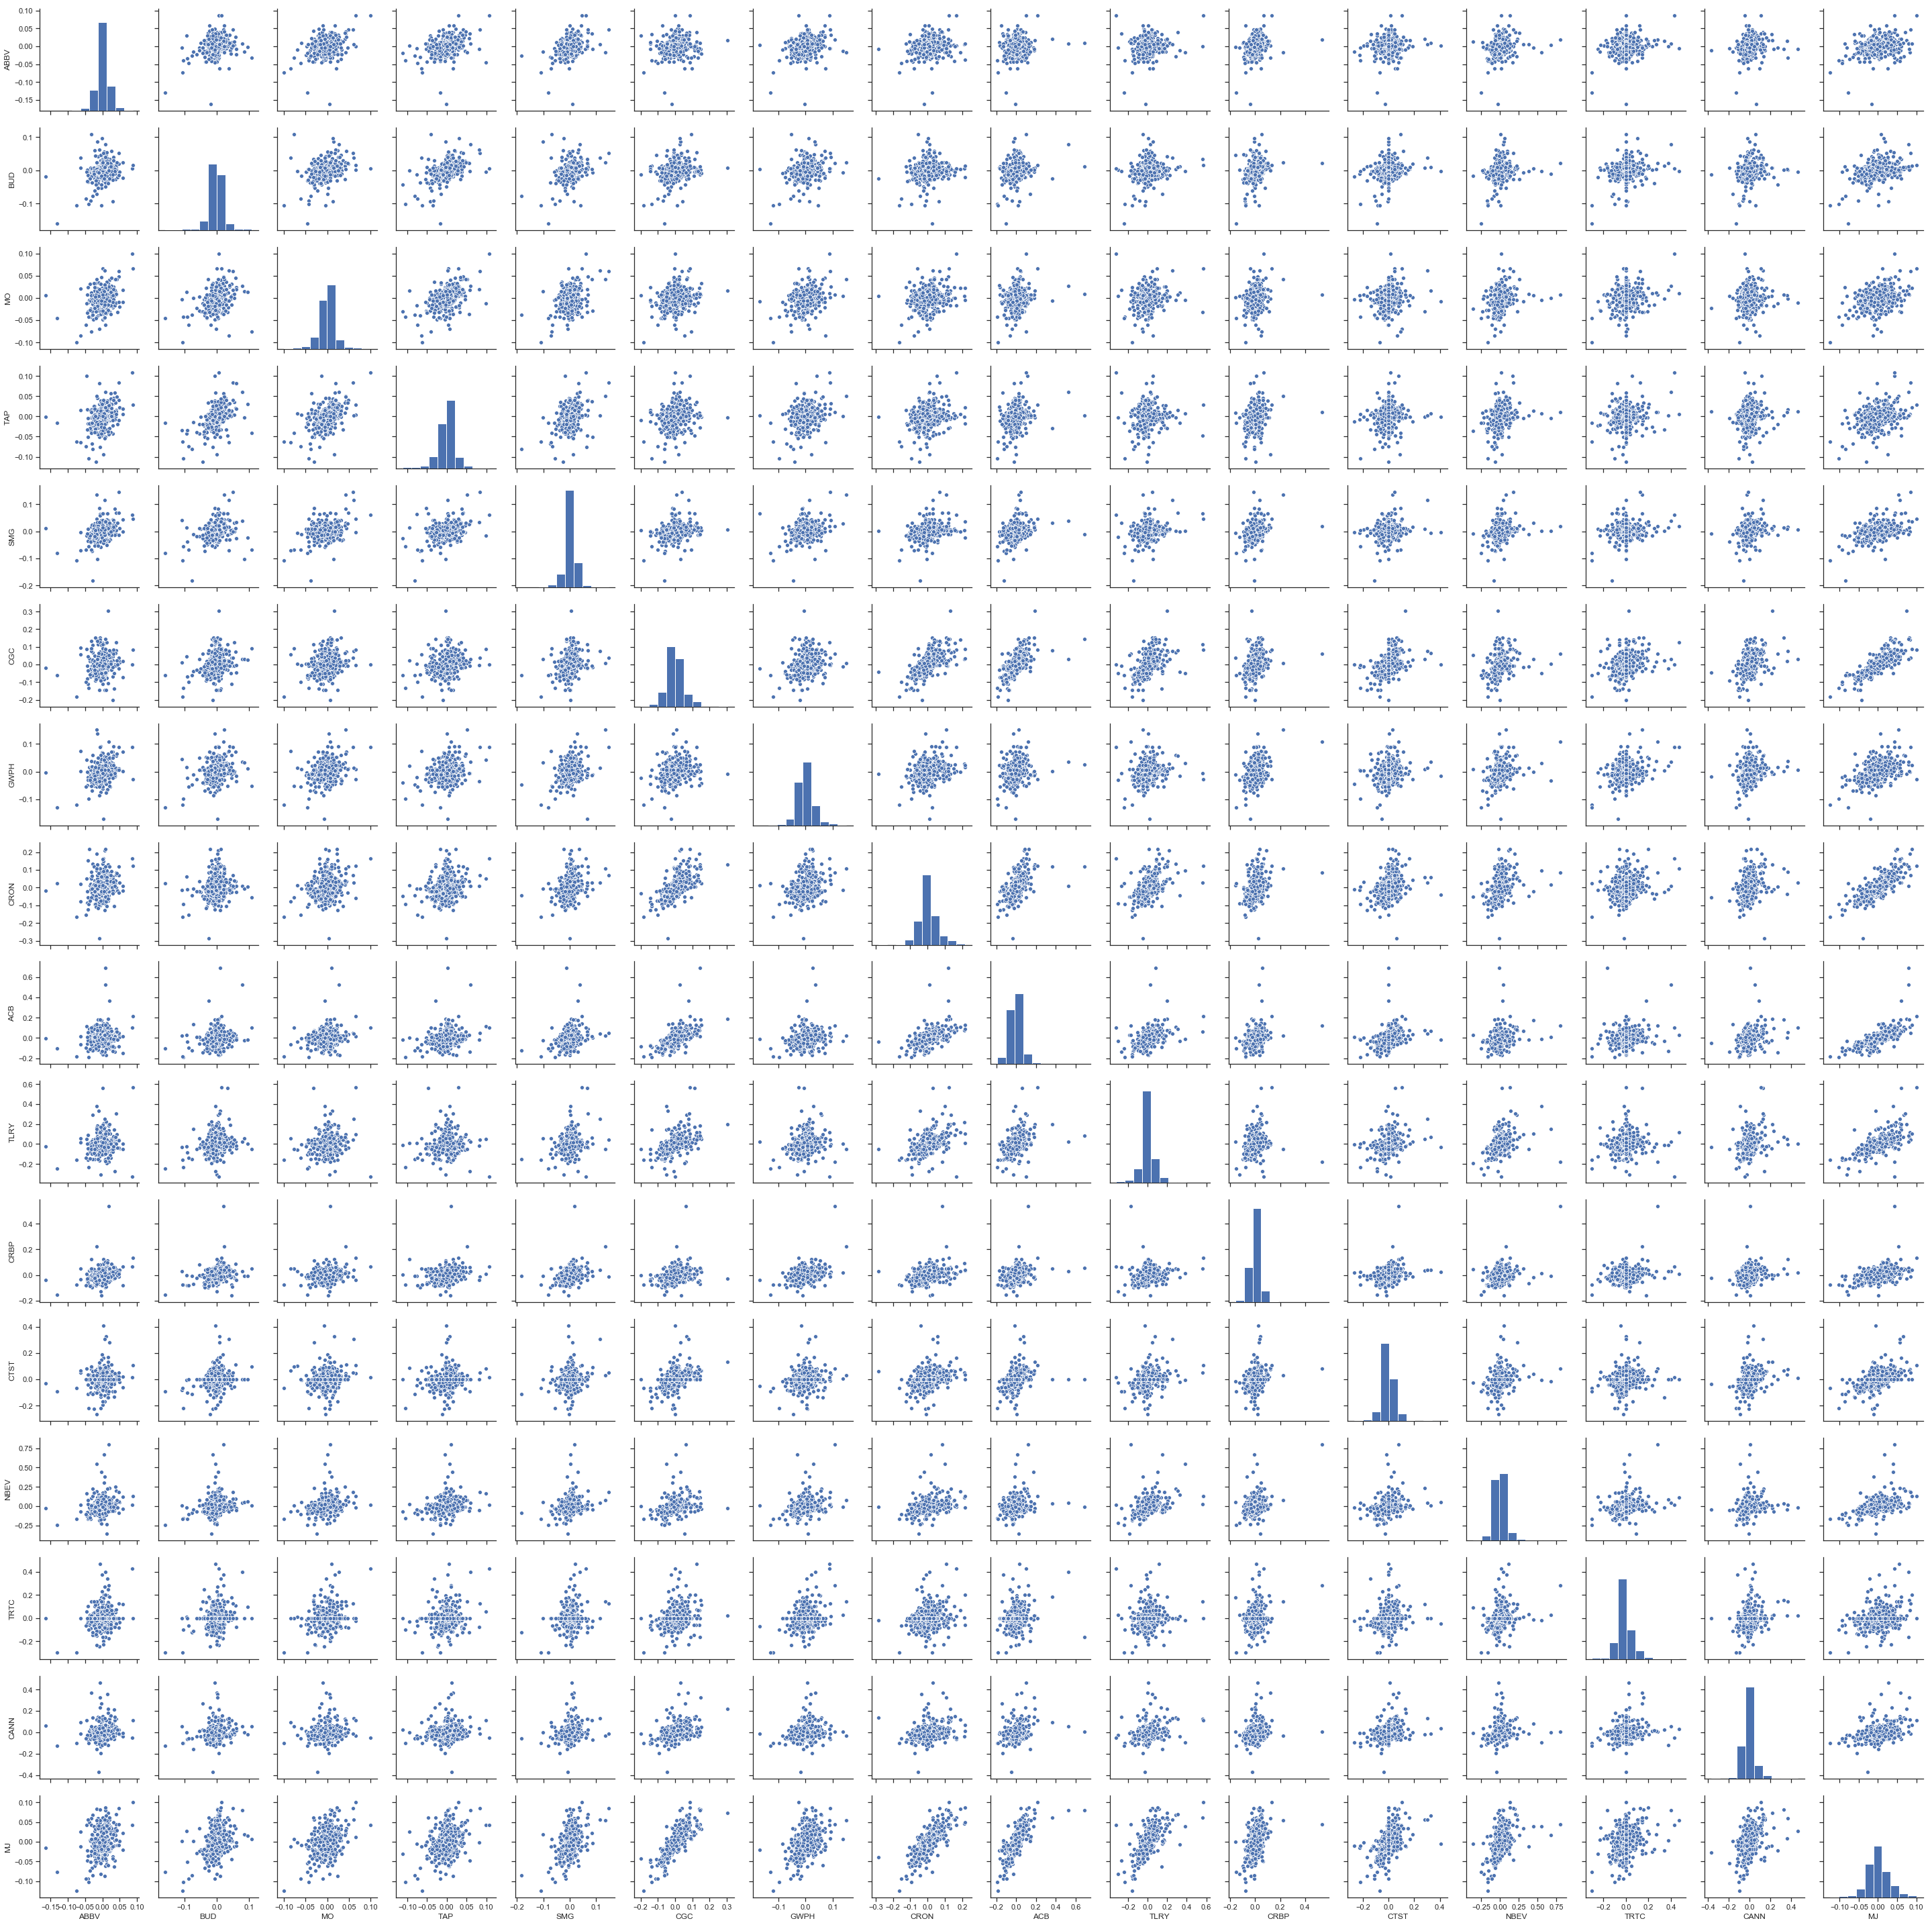

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

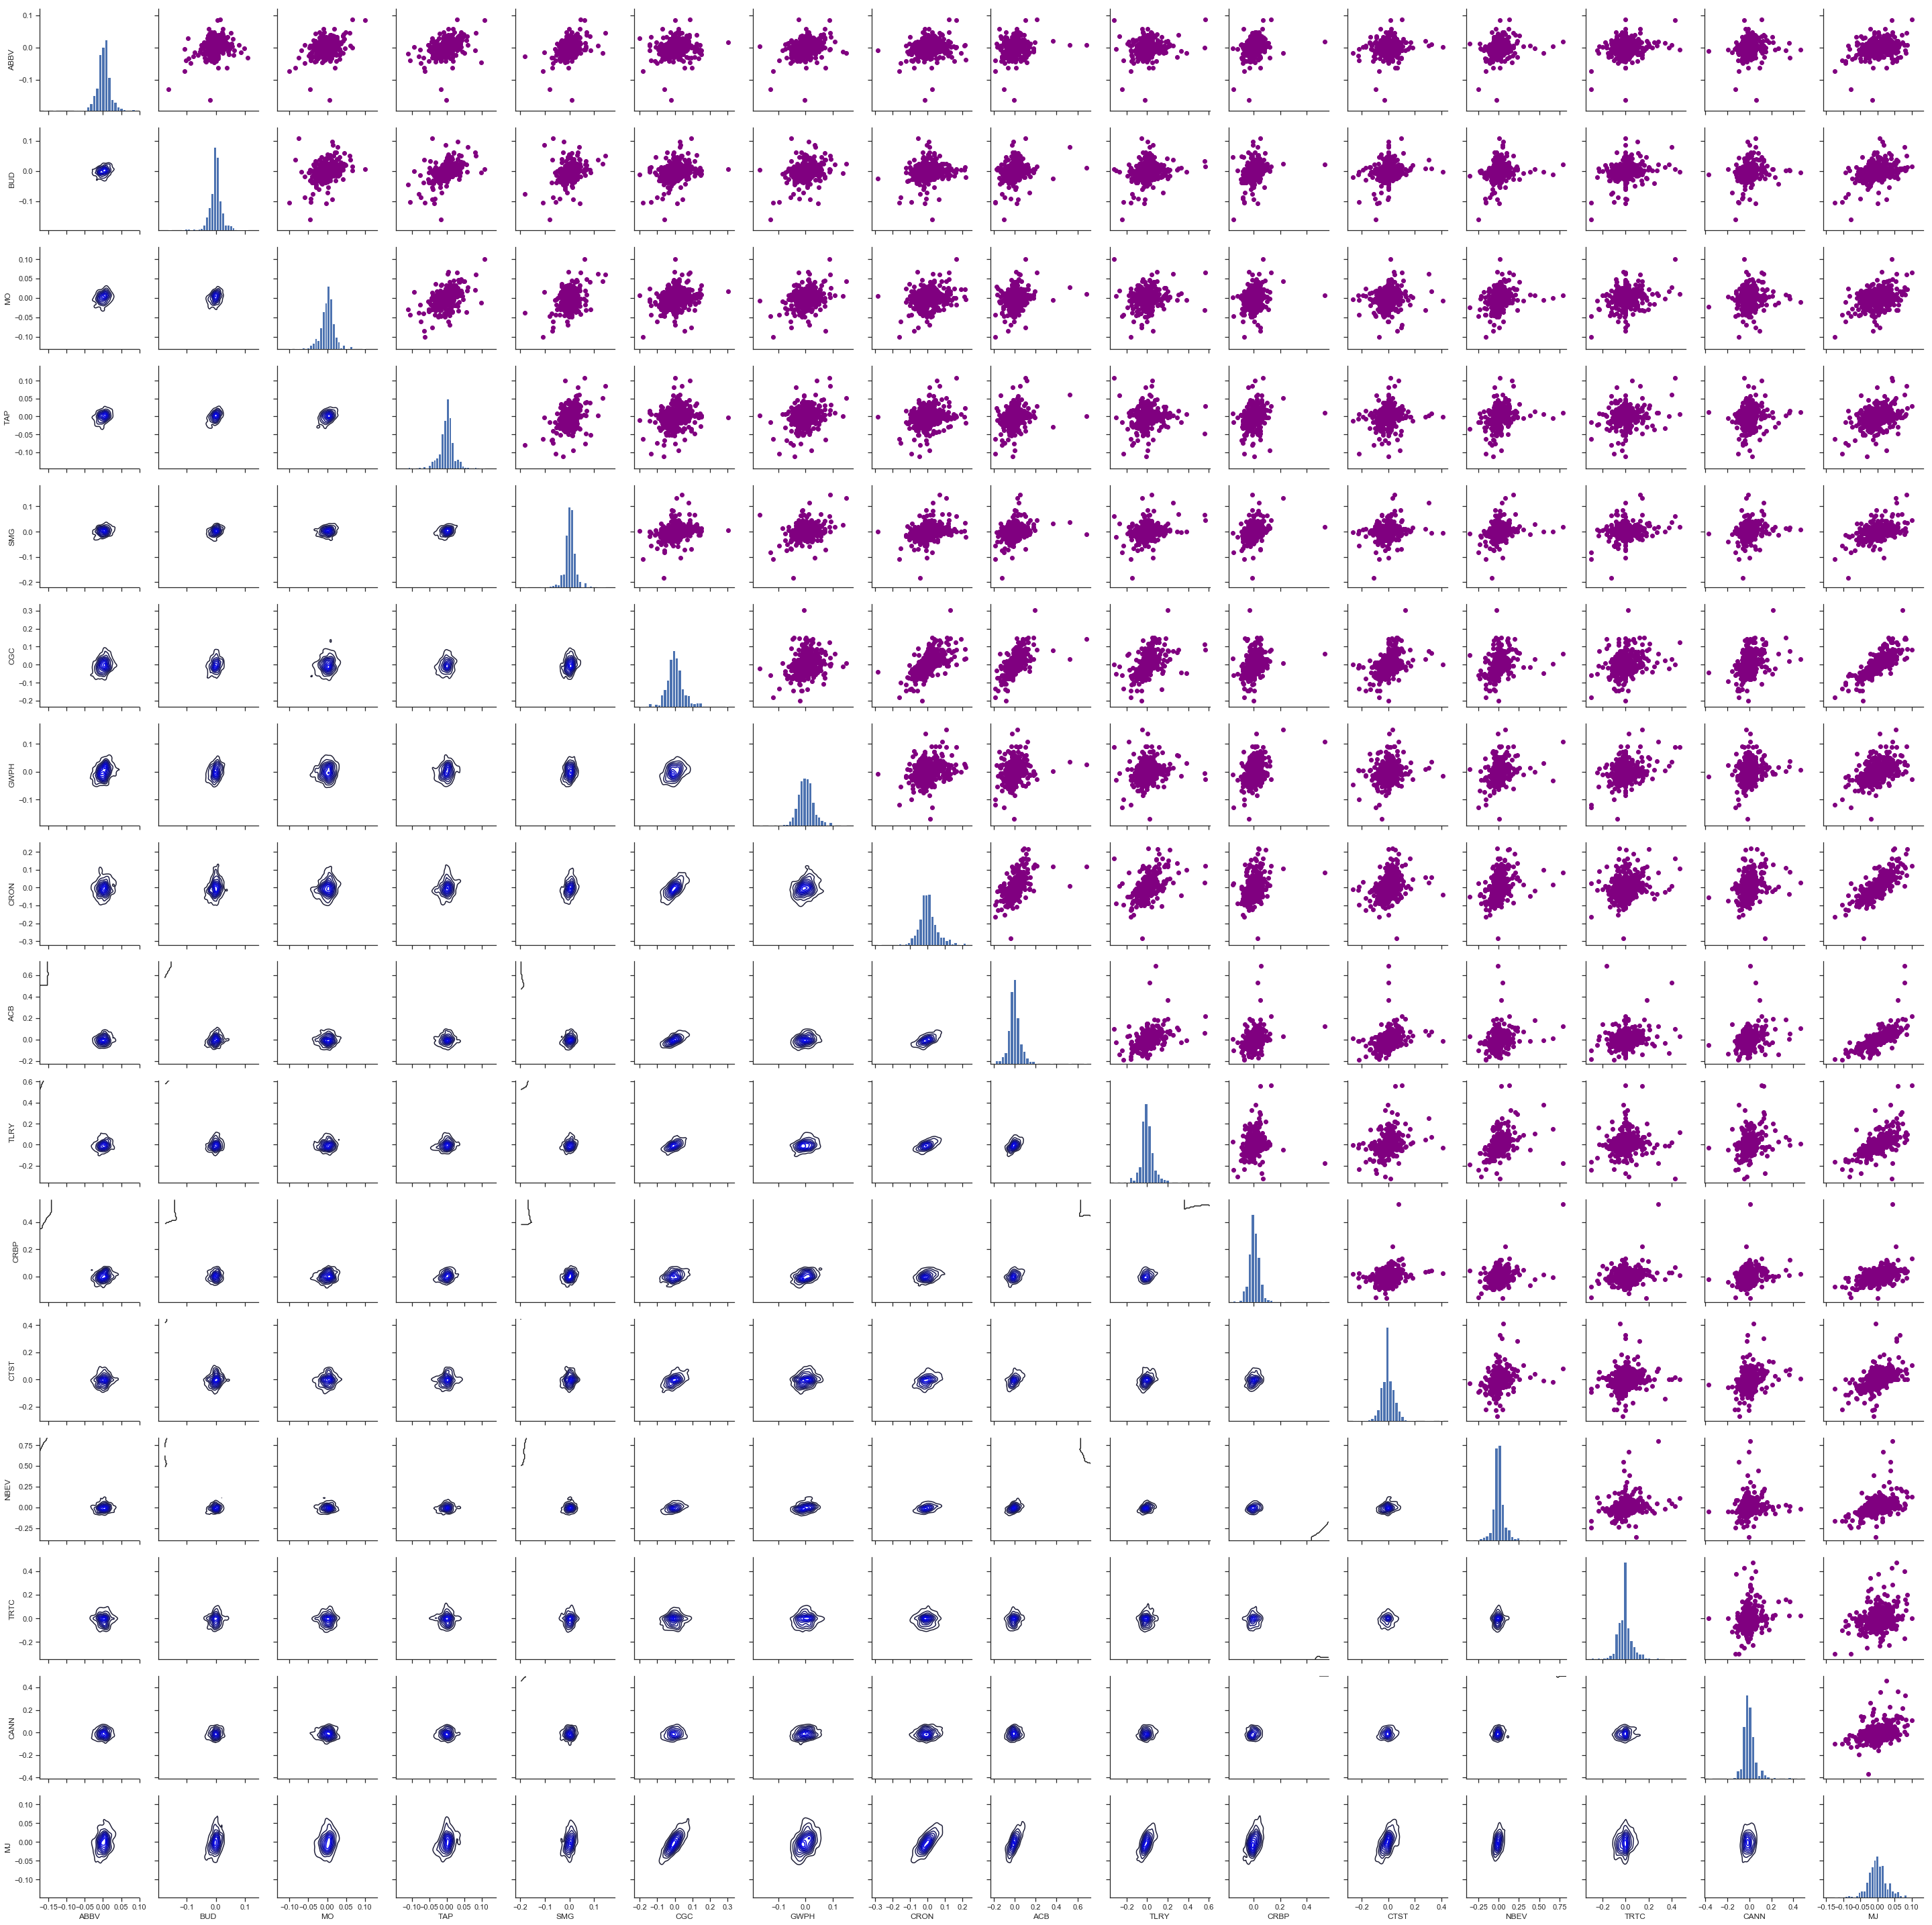

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

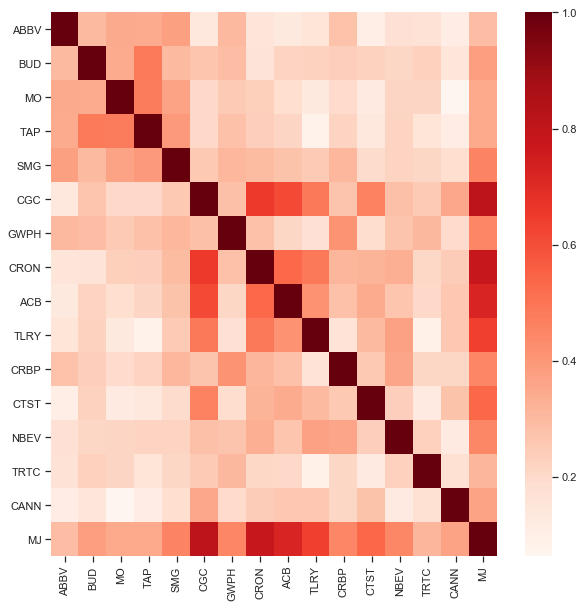

In [17]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

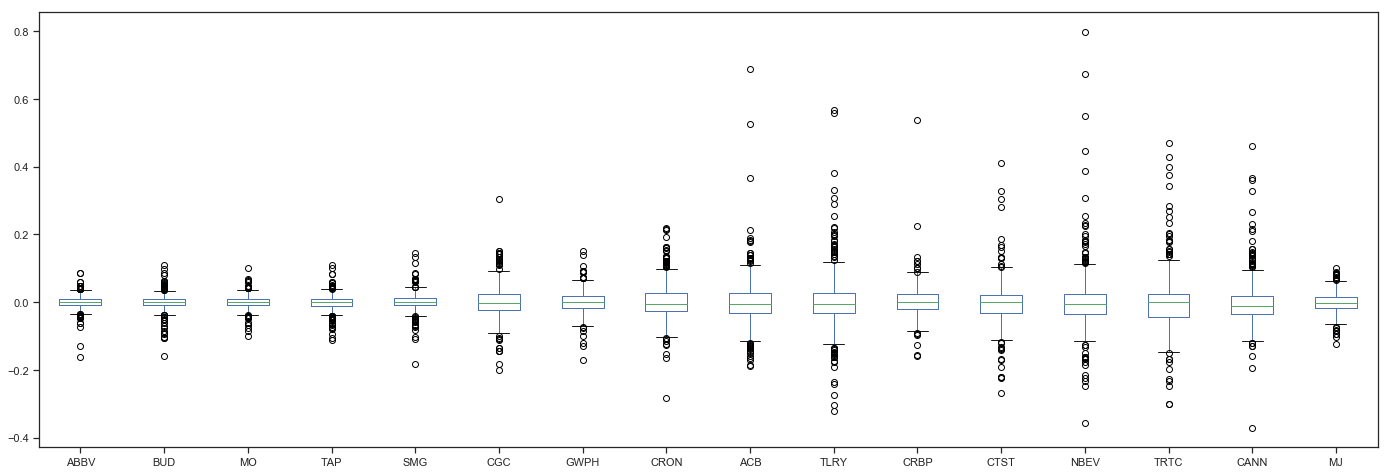

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

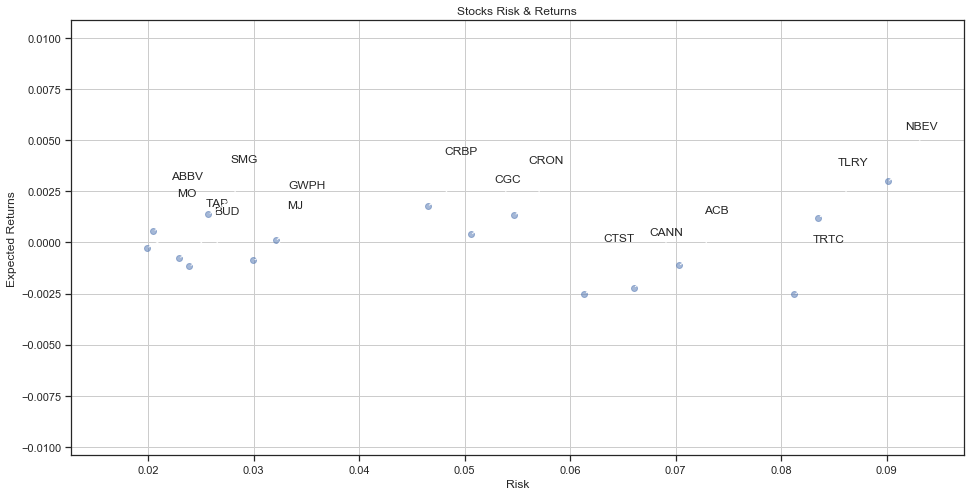

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

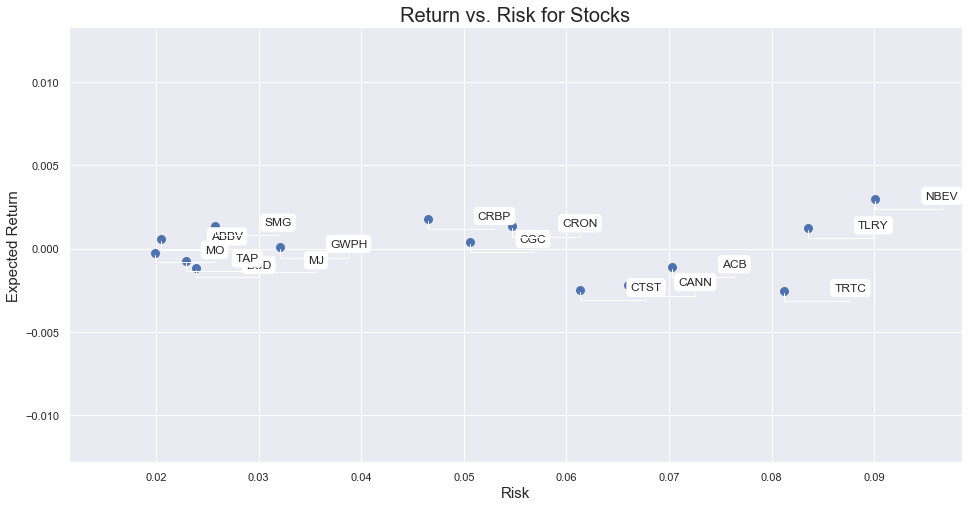

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

MJ    MJ      1.000000
CANN  CANN    1.000000
BUD   BUD     1.000000
MO    MO      1.000000
TAP   TAP     1.000000
SMG   SMG     1.000000
CGC   CGC     1.000000
GWPH  GWPH    1.000000
CRON  CRON    1.000000
ACB   ACB     1.000000
TLRY  TLRY    1.000000
CRBP  CRBP    1.000000
CTST  CTST    1.000000
NBEV  NBEV    1.000000
TRTC  TRTC    1.000000
ABBV  ABBV    1.000000
MJ    CGC     0.810819
CGC   MJ      0.810819
MJ    CRON    0.782384
CRON  MJ      0.782384
ACB   MJ      0.725535
MJ    ACB     0.725535
CRON  CGC     0.653592
CGC   CRON    0.653592
TLRY  MJ      0.640486
MJ    TLRY    0.640486
ACB   CGC     0.613705
CGC   ACB     0.613705
MJ    CTST    0.536440
CTST  MJ      0.536440
                ...   
CRON  ABBV    0.151795
ABBV  CRON    0.151795
BUD   CANN    0.148070
CANN  BUD     0.148070
CGC   ABBV    0.142989
ABBV  CGC     0.142989
CTST  TAP     0.140202
TAP   CTST    0.140202
ACB   ABBV    0.132702
ABBV  ACB     0.132702
MO    TLRY    0.130087
TLRY  MO      0.130087
CTST  TRTC 

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

ABBV       BUD        MO       TAP       SMG       CGC  \
Date                                                                     
2018-07-20  0.604578  0.635554  0.561502  0.435226  0.551081  0.310425   
2018-07-23  0.672953  0.605948  0.495865  0.535980  0.549957  0.506239   
2018-07-24  0.746747  0.599176  0.534830  0.591846  0.505120  0.362205   
2018-07-25  0.720006  0.658794  0.488151  0.578326  0.570751  0.434735   
2018-07-26  0.686147  0.409254  0.349327  0.500146  0.579742  0.355298   

                GWPH      CRON       ACB      TLRY      CRBP      CTST  \
Date                                                                     
2018-07-20  0.480990  0.482049  0.184212  0.732799  0.203233  0.363230   
2018-07-23  0.482726  0.542339  0.256214  0.350436  0.202740  0.468312   
2018-07-24  0.486289  0.508074  0.133584  0.206493  0.215911  0.391442   
2018-07-25  0.522931  0.573099  0.194646  0.412568  0.215780  0.355515   
2018-07-26  0.553044  0.519172  0.202836  0.358694  0.215646  0.317725   

                NBEV      TRTC      CANN        MJ  
Date                                                
2018-07-20  0.435448  0.411433  0.397675  0.524747  
2018-07-23  0.316607  0.411062  0.395720  0.617023  
2018-07-24  0.256177  0.446355  0.377724  0.470588  
2018-07-25  0.329082  0.457614  0.491436  0.526045  
2018-07-26  0.314885  0.493130  0.398628  0.461898

In [23]:
Normalized_Value.corr()

ABBV       BUD        MO       TAP       SMG       CGC      GWPH  \
ABBV  1.000000  0.299752  0.345455  0.341370  0.376258  0.142989  0.303617   
BUD   0.299752  1.000000  0.341752  0.487035  0.300006  0.264805  0.290838   
MO    0.345455  0.341752  1.000000  0.480350  0.369055  0.203886  0.251809   
TAP   0.341370  0.487035  0.480350  1.000000  0.394010  0.204026  0.282370   
SMG   0.376258  0.300006  0.369055  0.394010  1.000000  0.254896  0.310430   
CGC   0.142989  0.264805  0.203886  0.204026  0.254896  1.000000  0.283343   
GWPH  0.303617  0.290838  0.251809  0.282370  0.310430  0.283343  1.000000   
CRON  0.151795  0.159286  0.233539  0.235371  0.294889  0.653592  0.279702   
ACB   0.132702  0.224127  0.187347  0.213307  0.274614  0.613705  0.211599   
TLRY  0.158178  0.224583  0.130087  0.081623  0.253283  0.489689  0.176141   
CRBP  0.276853  0.238561  0.197093  0.219056  0.311451  0.270534  0.413548   
CTST  0.106502  0.225768  0.124939  0.140202  0.194524  0.459309  0.188948   
NBEV  0.175593  0.212874  0.215947  0.220178  0.217895  0.283808  0.271676   
TRTC  0.171783  0.228349  0.216387  0.155940  0.210210  0.251091  0.306750   
CANN  0.111023  0.148070  0.063279  0.107233  0.185494  0.352733  0.195904   
MJ    0.290858  0.379891  0.350375  0.349039  0.458283  0.810819  0.449297   

          CRON       ACB      TLRY      CRBP      CTST      NBEV      TRTC  \
ABBV  0.151795  0.132702  0.158178  0.276853  0.106502  0.175593  0.171783   
BUD   0.159286  0.224127  0.224583  0.238561  0.225768  0.212874  0.228349   
MO    0.233539  0.187347  0.130087  0.197093  0.124939  0.215947  0.216387   
TAP   0.235371  0.213307  0.081623  0.219056  0.140202  0.220178  0.155940   
SMG   0.294889  0.274614  0.253283  0.311451  0.194524  0.217895  0.210210   
CGC   0.653592  0.613705  0.489689  0.270534  0.459309  0.283808  0.251091   
GWPH  0.279702  0.211599  0.176141  0.413548  0.188948  0.271676  0.306750   
CRON  1.000000  0.535275  0.488517  0.312369  0.317387  0.332213  0.206619   
ACB   0.535275  1.000000  0.416411  0.282352  0.343071  0.264705  0.204751   
TLRY  0.488517  0.416411  1.000000  0.166846  0.298170  0.373232  0.093788   
CRBP  0.312369  0.282352  0.166846  1.000000  0.254839  0.360862  0.211844   
CTST  0.317387  0.343071  0.298170  0.254839  1.000000  0.235262  0.126612   
NBEV  0.332213  0.264705  0.373232  0.360862  0.235262  1.000000  0.230254   
TRTC  0.206619  0.204751  0.093788  0.211844  0.126612  0.230254  1.000000   
CANN  0.245535  0.258721  0.258778  0.212167  0.271966  0.122163  0.179612   
MJ    0.782384  0.725535  0.640486  0.447811  0.536440  0.444827  0.315233   

          CANN        MJ  
ABBV  0.111023  0.290858  
BUD   0.148070  0.379891  
MO    0.063279  0.350375  
TAP   0.107233  0.349039  
SMG   0.185494  0.458283  
CGC   0.352733  0.810819  
GWPH  0.195904  0.449297  
CRON  0.245535  0.782384  
ACB   0.258721  0.725535  
TLRY  0.258778  0.640486  
CRBP  0.212167  0.447811  
CTST  0.271966  0.536440  
NBEV  0.122163  0.444827  
TRTC  0.179612  0.315233  
CANN  1.000000  0.368335  
MJ    0.368335  1.000000

In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

MJ    MJ      1.000000
CANN  CANN    1.000000
BUD   BUD     1.000000
MO    MO      1.000000
TAP   TAP     1.000000
SMG   SMG     1.000000
CGC   CGC     1.000000
GWPH  GWPH    1.000000
CRON  CRON    1.000000
ACB   ACB     1.000000
TLRY  TLRY    1.000000
CRBP  CRBP    1.000000
CTST  CTST    1.000000
NBEV  NBEV    1.000000
TRTC  TRTC    1.000000
ABBV  ABBV    1.000000
MJ    CGC     0.810819
CGC   MJ      0.810819
MJ    CRON    0.782384
CRON  MJ      0.782384
ACB   MJ      0.725535
MJ    ACB     0.725535
CRON  CGC     0.653592
CGC   CRON    0.653592
TLRY  MJ      0.640486
MJ    TLRY    0.640486
ACB   CGC     0.613705
CGC   ACB     0.613705
MJ    CTST    0.536440
CTST  MJ      0.536440
                ...   
CRON  ABBV    0.151795
ABBV  CRON    0.151795
BUD   CANN    0.148070
CANN  BUD     0.148070
CGC   ABBV    0.142989
ABBV  CGC     0.142989
CTST  TAP     0.140202
TAP   CTST    0.140202
ACB   ABBV    0.132702
ABBV  ACB     0.132702
MO    TLRY    0.130087
TLRY  MO      0.130087
CTST  TRTC 

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
ABBV    0.000553
BUD    -0.001157
MO     -0.000263
TAP    -0.000762
SMG     0.001381
CGC     0.000400
GWPH    0.000103
CRON    0.001340
ACB    -0.001118
TLRY    0.001221
CRBP    0.001782
CTST   -0.002506
NBEV    0.002995
TRTC   -0.002544
CANN   -0.002204
MJ     -0.000878
dtype: float64
--------------------------------------------------
Stock risks:
ABBV    0.020498
BUD     0.023911
MO      0.019894
TAP     0.022924
SMG     0.025713
CGC     0.050582
GWPH    0.032086
CRON    0.054711
ACB     0.070286
TLRY    0.083543
CRBP    0.046494
CTST    0.061369
NBEV    0.090104
TRTC    0.081239
CANN    0.066023
MJ      0.029951
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

Returns      Risk
TRTC -0.002544  0.081239
CTST -0.002506  0.061369
CANN -0.002204  0.066023
BUD  -0.001157  0.023911
ACB  -0.001118  0.070286
MJ   -0.000878  0.029951
TAP  -0.000762  0.022924
MO   -0.000263  0.019894
GWPH  0.000103  0.032086
CGC   0.000400  0.050582
ABBV  0.000553  0.020498
TLRY  0.001221  0.083543
CRON  0.001340  0.054711
SMG   0.001381  0.025713
CRBP  0.001782  0.046494
NBEV  0.002995  0.090104

In [27]:
table.sort_values(by='Risk')

Returns      Risk
MO   -0.000263  0.019894
ABBV  0.000553  0.020498
TAP  -0.000762  0.022924
BUD  -0.001157  0.023911
SMG   0.001381  0.025713
MJ   -0.000878  0.029951
GWPH  0.000103  0.032086
CRBP  0.001782  0.046494
CGC   0.000400  0.050582
CRON  0.001340  0.054711
CTST -0.002506  0.061369
CANN -0.002204  0.066023
ACB  -0.001118  0.070286
TRTC -0.002544  0.081239
TLRY  0.001221  0.083543
NBEV  0.002995  0.090104

In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

Returns      Risk  Sharpe Ratio
ABBV  0.000553  0.020498     -0.460876
BUD  -0.001157  0.023911     -0.466629
MO   -0.000263  0.019894     -0.515883
TAP  -0.000762  0.022924     -0.469473
SMG   0.001381  0.025713     -0.335198
CGC   0.000400  0.050582     -0.189792
GWPH  0.000103  0.032086     -0.308445
CRON  0.001340  0.054711     -0.158285
ACB  -0.001118  0.070286     -0.158187
TLRY  0.001221  0.083543     -0.105087
CRBP  0.001782  0.046494     -0.176764
CTST -0.002506  0.061369     -0.203778
NBEV  0.002995  0.090104     -0.077747
TRTC -0.002544  0.081239     -0.154405
CANN -0.002204  0.066023     -0.184838
MJ   -0.000878  0.029951     -0.363179

In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
ABBV  0.000553  0.020498     -0.460876     0.087174    -0.162524   
BUD  -0.001157  0.023911     -0.466629     0.108361    -0.160081   
MO   -0.000263  0.019894     -0.515883     0.100220    -0.100296   
TAP  -0.000762  0.022924     -0.469473     0.108333    -0.111761   
SMG   0.001381  0.025713     -0.335198     0.146244    -0.182526   
CGC   0.000400  0.050582     -0.189792     0.304224    -0.200276   
GWPH  0.000103  0.032086     -0.308445     0.150662    -0.170612   
CRON  0.001340  0.054711     -0.158285     0.217225    -0.284144   
ACB  -0.001118  0.070286     -0.158187     0.686747    -0.188889   
TLRY  0.001221  0.083543     -0.105087     0.567460    -0.322689   
CRBP  0.001782  0.046494     -0.176764     0.536232    -0.159806   
CTST -0.002506  0.061369     -0.203778     0.408889    -0.268139   
NBEV  0.002995  0.090104     -0.077747     0.796339    -0.356098   
TRTC -0.002544  0.081239     -0.154405     0.470588    -0.300000   
CANN -0.002204  0.066023     -0.184838     0.461404    -0.370235   
MJ   -0.000878  0.029951     -0.363179     0.100909    -0.125220   

      Median Returns  Total Return  
ABBV        0.001478     -2.229985  
BUD        -0.000360     -6.103648  
MO          0.001163     -2.255825  
TAP         0.000220     -3.871481  
SMG         0.001494     -1.781241  
CGC        -0.003133     -3.074250  
GWPH       -0.001091     -2.656000  
CRON       -0.004667     -2.297092  
ACB        -0.006305      0.662740  
TLRY       -0.005014     -4.789729  
CRBP        0.000000     -2.331283  
CTST        0.000000      0.000000  
NBEV       -0.006292     -7.407408  
TRTC        0.000000      0.000000  
CANN       -0.011137     -3.948599  
MJ         -0.001668     -2.876109

In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
ABBV  0.000553  0.020498     -0.460876     0.087174    -0.162524   
BUD  -0.001157  0.023911     -0.466629     0.108361    -0.160081   
MO   -0.000263  0.019894     -0.515883     0.100220    -0.100296   
TAP  -0.000762  0.022924     -0.469473     0.108333    -0.111761   
SMG   0.001381  0.025713     -0.335198     0.146244    -0.182526   
CGC   0.000400  0.050582     -0.189792     0.304224    -0.200276   
GWPH  0.000103  0.032086     -0.308445     0.150662    -0.170612   
CRON  0.001340  0.054711     -0.158285     0.217225    -0.284144   
ACB  -0.001118  0.070286     -0.158187     0.686747    -0.188889   
TLRY  0.001221  0.083543     -0.105087     0.567460    -0.322689   
CRBP  0.001782  0.046494     -0.176764     0.536232    -0.159806   
CTST -0.002506  0.061369     -0.203778     0.408889    -0.268139   
NBEV  0.002995  0.090104     -0.077747     0.796339    -0.356098   
TRTC -0.002544  0.081239     -0.154405     0.470588    -0.300000   
CANN -0.002204  0.066023     -0.184838     0.461404    -0.370235   
MJ   -0.000878  0.029951     -0.363179     0.100909    -0.125220   

      Median Returns  Total Return  Average Return Days  
ABBV        0.001478     -2.229985            -0.000025  
BUD        -0.000360     -6.103648            -0.000070  
MO          0.001163     -2.255825            -0.000025  
TAP         0.000220     -3.871481            -0.000044  
SMG         0.001494     -1.781241            -0.000020  
CGC        -0.003133     -3.074250            -0.000035  
GWPH       -0.001091     -2.656000            -0.000030  
CRON       -0.004667     -2.297092            -0.000026  
ACB        -0.006305      0.662740             0.000007  
TLRY       -0.005014     -4.789729            -0.000054  
CRBP        0.000000     -2.331283            -0.000026  
CTST        0.000000      0.000000             0.000000  
NBEV       -0.006292     -7.407408            -0.000085  
TRTC        0.000000      0.000000             0.000000  
CANN       -0.011137     -3.948599            -0.000045  
MJ         -0.001668     -2.876109            -0.000032

In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
ABBV  0.000553  0.020498     -0.460876     0.087174    -0.162524   
BUD  -0.001157  0.023911     -0.466629     0.108361    -0.160081   
MO   -0.000263  0.019894     -0.515883     0.100220    -0.100296   
TAP  -0.000762  0.022924     -0.469473     0.108333    -0.111761   
SMG   0.001381  0.025713     -0.335198     0.146244    -0.182526   
CGC   0.000400  0.050582     -0.189792     0.304224    -0.200276   
GWPH  0.000103  0.032086     -0.308445     0.150662    -0.170612   
CRON  0.001340  0.054711     -0.158285     0.217225    -0.284144   
ACB  -0.001118  0.070286     -0.158187     0.686747    -0.188889   
TLRY  0.001221  0.083543     -0.105087     0.567460    -0.322689   
CRBP  0.001782  0.046494     -0.176764     0.536232    -0.159806   
CTST -0.002506  0.061369     -0.203778     0.408889    -0.268139   
NBEV  0.002995  0.090104     -0.077747     0.796339    -0.356098   
TRTC -0.002544  0.081239     -0.154405     0.470588    -0.300000   
CANN -0.002204  0.066023     -0.184838     0.461404    -0.370235   
MJ   -0.000878  0.029951     -0.363179     0.100909    -0.125220   

      Median Returns  Total Return  Average Return Days      CAGR  
ABBV        0.001478     -2.229985            -0.000025  0.028927  
BUD        -0.000360     -6.103648            -0.000070 -0.191453  
MO          0.001163     -2.255825            -0.000025 -0.110096  
TAP         0.000220     -3.871481            -0.000044 -0.186360  
SMG         0.001494     -1.781241            -0.000020  0.068500  
CGC        -0.003133     -3.074250            -0.000035 -0.114805  
GWPH       -0.001091     -2.656000            -0.000030 -0.026709  
CRON       -0.004667     -2.297092            -0.000026       NaN  
ACB        -0.006305      0.662740             0.000007 -0.446040  
TLRY       -0.005014     -4.789729            -0.000054       NaN  
CRBP        0.000000     -2.331283            -0.000026  0.000350  
CTST        0.000000      0.000000             0.000000       NaN  
NBEV       -0.006292     -7.407408            -0.000085 -0.103526  
TRTC        0.000000      0.000000             0.000000 -0.684544  
CANN       -0.011137     -3.948599            -0.000045 -0.565101  
MJ         -0.001668     -2.876109            -0.000032 -0.222094

In [35]:
table.sort_values(by='Average Return Days')

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
NBEV  0.002995  0.090104     -0.077747     0.796339    -0.356098   
BUD  -0.001157  0.023911     -0.466629     0.108361    -0.160081   
TLRY  0.001221  0.083543     -0.105087     0.567460    -0.322689   
CANN -0.002204  0.066023     -0.184838     0.461404    -0.370235   
TAP  -0.000762  0.022924     -0.469473     0.108333    -0.111761   
CGC   0.000400  0.050582     -0.189792     0.304224    -0.200276   
MJ   -0.000878  0.029951     -0.363179     0.100909    -0.125220   
GWPH  0.000103  0.032086     -0.308445     0.150662    -0.170612   
CRBP  0.001782  0.046494     -0.176764     0.536232    -0.159806   
CRON  0.001340  0.054711     -0.158285     0.217225    -0.284144   
MO   -0.000263  0.019894     -0.515883     0.100220    -0.100296   
ABBV  0.000553  0.020498     -0.460876     0.087174    -0.162524   
SMG   0.001381  0.025713     -0.335198     0.146244    -0.182526   
CTST -0.002506  0.061369     -0.203778     0.408889    -0.268139   
TRTC -0.002544  0.081239     -0.154405     0.470588    -0.300000   
ACB  -0.001118  0.070286     -0.158187     0.686747    -0.188889   

      Median Returns  Total Return  Average Return Days      CAGR  
NBEV       -0.006292     -7.407408            -0.000085 -0.103526  
BUD        -0.000360     -6.103648            -0.000070 -0.191453  
TLRY       -0.005014     -4.789729            -0.000054       NaN  
CANN       -0.011137     -3.948599            -0.000045 -0.565101  
TAP         0.000220     -3.871481            -0.000044 -0.186360  
CGC        -0.003133     -3.074250            -0.000035 -0.114805  
MJ         -0.001668     -2.876109            -0.000032 -0.222094  
GWPH       -0.001091     -2.656000            -0.000030 -0.026709  
CRBP        0.000000     -2.331283            -0.000026  0.000350  
CRON       -0.004667     -2.297092            -0.000026       NaN  
MO          0.001163     -2.255825            -0.000025 -0.110096  
ABBV        0.001478     -2.229985            -0.000025  0.028927  
SMG         0.001494     -1.781241            -0.000020  0.068500  
CTST        0.000000      0.000000             0.000000       NaN  
TRTC        0.000000      0.000000             0.000000 -0.684544  
ACB        -0.006305      0.662740             0.000007 -0.446040